<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms_from_Scratch/blob/main/ML_Algorithms_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Random Forest**

## **Random Forest Basics**

**Random forests** are known as **ensemble learning methods** used for classification and regression. Random forests are essentially **a collection of decision trees that are each fit on a subsample of the data**. While an individual tree is typically noisey and subject to high variance, random forests average many different trees, which in turn reduces the variability and leave us with a powerful classifier. Random forests are also non-parametric and require little to no parameter tuning. They differ from many common machine learning models that are typically optimized using gradient descent.

## **Bootstrap Sampling**

One of the main reasons random forests are so powerul is due to the randomness injected into each tree. Each individual decision tree will be constructed on a **bootstrapped subset** of our data. If our dataset has $n$ observations bootstrapping is the process of sampling $n$ points **with replacement**. This means that some obsverations in our data set will be selected more than once and some won't be selected at all. Since each individual tree is built on bootstrapped subset of the data, we'll find that most trees will differ significantly from one another.

The other great thing that comes with bootstrapping is that we get whats called an **out-of-bag error estimate** for free. The **OOB (out-of-bag)** samples are the observations that were **not selected** to build a parcticular tree. We can compute an OOB score for each tree and take the average of all those scores to get an estimate for how accurate our random forests performs, this is essentially **leave-one-out cross validation**. This will give us an estimate for how accurate our model is without having to formally test it on new data.

## **Bagging**

**Bootstrap AGgregation**, also known as **Bagging**, is a powerful ensemble method to prevent overfitting. The concept behind bagging is to combine the predictions of several base learners to create a more accurate output. Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees. In the process of growing a tree where each node in the tree looks at every value in our bootstrapped sample in every feature to find the best split in the data at that particular node. This is repeated for all trees.

Random forests follow the same procedure as bagging, however, the key difference is that on a dataset with $p$ features each tree will only look at a **subset of $m$ features** where $m=(\sqrt p)$. This is injecting even more randomness into the model due to the fact that if we sampled all $p$ features in each tree we would likely be making splits at the same values from the same features in most trees. Given that we are only looking at ($\sqrt p$) features at one time many of the trees will look at different groups of features from one another. With this, we'll be able to produce many **uncorrelated** trees which will help us capture a lot of the variability as well as interactions between multiple variables.

Once each model has developed a hypothesis. The models use **voting** for classification or **averaging** for regression. Each hypothesis has the same weight as all the others. Essentially, all these models run at the same time, and vote on which hypothesis is the most accurate. This helps to decrease variance i.e. reduce the overfit.

## **Random Forest Algorithm**

Suppose we have the following data data ${(\vec x_1,y_1),(\vec x_2,y_2),..,(\vec x_n,y_n)}$ where each $\vec x_i$ represents a feature vector $[x_{i1},x_{i2},\cdots,x_{im}]$ and let $B$ be the number of trees we want to construct in our forest. We will do the following,

1. for $b=1$ to $B$: 
    
    A. **Draw a bootstrap sample of size $n$** from the data
    
    B. Grow a decision tree $T_{b}$ from our bootstrapped sample, by repeating the following steps until the each node consists of 1 class only or until we've reached the minimum node size
    * **Sample $m=\sqrt p$ features** (where $p$ is the number of features in our dataset)
    * Compute the Gini Impurity for each possible value among the bootstrapped data and $m$ features
    * split the node into 2 children nodes

2. Output the ensemble of trees ${T}^{B}$

3. In case of a regression problem, for a new record, each tree in the forest predicts a value. The final value can be calculated by taking the average of all the values predicted by all the trees in the forest. Or, in the case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

## **Dataset Initialization**

In [196]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
np.random.seed(0)

# radius of the circle
circle_r = 1

# center of the circle (x, y)
circle_x_1, circle_y_1 = 3, 3.2
circle_x_2, circle_y_2 = 3, 1.75
circle_x_3, circle_y_3 = 4.5, 3
circle_x_4, circle_y_4 = 4.5, 1.75

# random angle
alpha_1 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_2 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_3 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_4 = 2 * np.math.pi * np.random.rand(50, 1) 

# random radius
r_1 = circle_r * np.sqrt(np.random.rand(50, 1))
r_2 = circle_r * np.sqrt(np.random.rand(50, 1))
r_3 = circle_r * np.sqrt(np.random.rand(50, 1))
r_4 = circle_r * np.sqrt(np.random.rand(50, 1))

# calculating coordinates
x_1, y_1 = r_1 * np.cos(alpha_1) + circle_x_1, r_1 * np.sin(alpha_1) + circle_y_1
x_2, y_2 = r_2 * np.cos(alpha_2) + circle_x_2, r_2 * np.sin(alpha_2) + circle_y_2
x_3, y_3 = r_3 * np.cos(alpha_3) + circle_x_3, r_3 * np.sin(alpha_3) + circle_y_3
x_4, y_4 = r_4 * np.cos(alpha_4) + circle_x_4, r_4 * np.sin(alpha_4) + circle_y_4

In [198]:
class_1, class_2 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1) 
class_3, class_4 = np.concatenate((x_3, y_3), axis=1), np.concatenate((x_4, y_4), axis=1)
zeros, ones, twos, threes = np.zeros((50,1)), np.ones((50,1)), np.ones((50,1))*2, np.ones((50,1))*3
x = np.concatenate((class_1, class_2, class_3, class_4), axis=0)
y = np.concatenate((zeros, ones, twos, threes), axis=0).ravel()

Text(0, 0.5, 'Y')

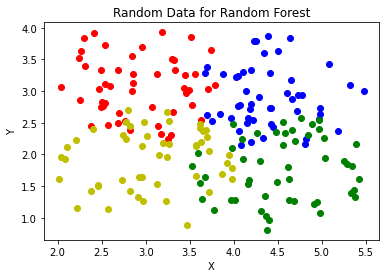

In [199]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y==0], x[:,1][y==0], c='r')
ax.scatter(x[:,0][y==1], x[:,1][y==1], c='y')
ax.scatter(x[:,0][y==2], x[:,1][y==2], c='b')
ax.scatter(x[:,0][y==3], x[:,1][y==3], c='g')
ax.set_title('Random Data for Random Forest')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## **Implementing Bagging and Random Forest from scratch**

In [201]:
class Node:
    def __init__(self, gini_index, samples, samples_in_classes, predicted_class):
        self.gini_index = gini_index
        self.samples = samples
        self.samples_in_classes = samples_in_classes
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [202]:
class DecisionTree:
    def __init__(self, max_features=10, max_depth=10):
        self.max_features = max_features
        self.max_depth = max_depth
    
    def fit(self, x, y):
        self.classes = len(set(y))
        self.features = x.shape[1]
        self.tree = self.grow_tree(x, y)
    
    def gini_function(self, y):
        m = y.shape[0]
        return 1 - sum((np.sum(y == c) / m)**2 for c in range(self.classes))
    
    def grow_tree(self, x, y, curr_depth=0):
        samples_in_classes = [np.sum(y == i) for i in range(self.classes)]
        predicted_class = np.argmax(samples_in_classes)
        node = Node(
            gini_index=self.gini_function(y),
            samples=y.shape[0],
            samples_in_classes=samples_in_classes,
            predicted_class=predicted_class
            )
        
        if curr_depth < self.max_depth:
            idx, thr = self.best_split(x, y)
            if idx is not None:
                indices_left = x[:, idx] < thr
                x_left, y_left = x[indices_left], y[indices_left]
                x_right, y_right = x[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self.grow_tree(x_left, y_left, curr_depth + 1)
                node.right = self.grow_tree(x_right, y_right, curr_depth + 1)

        return node
    
    def best_split(self, x, y):
        m = y.shape[0]
        if m <= 1:
            return None, None

        best_gini = self.gini_function(y)
        best_idx, best_thr = None, None

        for idx in np.random.choice(range(self.features), size=self.max_features):
            thresholds, classes = zip(*sorted(zip(x[:, idx], y)))
            num_left = [0] * self.classes
            num_right = [np.sum(y == c) for c in range(self.classes)]

            for i in range(1, m): 
                c = int(classes[i - 1])
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1 - sum((num_left[x] / i) ** 2 for x in range(self.classes))
                gini_right = 1 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.classes))
                gini = (i * gini_left + (m - i) * gini_right) / m

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  
        
        return best_idx, best_thr

    def predict(self, x):
        return np.array([self.predict_input(inputs) for inputs in x])

    def predict_input(self, x):
        node = self.tree
        while(node.left):
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

In [203]:
class RandomForest:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
    
    def draw_bootstrap(self, x, y):
        bootstrap_indices = list(np.random.choice(range(len(x)), len(x), replace = True))
        X_bootstrap = x[bootstrap_indices]
        y_bootstrap = y[bootstrap_indices]
        return X_bootstrap, y_bootstrap
    
    def fit(self, x, y):
        self.tree_list = []
        for i in range(self.n_estimators):
            X_bootstrap, y_bootstrap= self.draw_bootstrap(x, y)
            max_feature = int(np.sqrt(x.shape[1]))
            decision_tree = DecisionTree(max_features=max_feature)
            decision_tree.fit(X_bootstrap, y_bootstrap)
            self.tree_list.append(decision_tree)

    def predict(self, x):
        pred_list = []
        ensemble_preds = np.array([tree.predict(x) for tree in self.tree_list])
        for i in range(x.shape[0]):
            final_pred = max(ensemble_preds[:,i], key = ensemble_preds[:,i].tolist().count)
            pred_list.append(final_pred)
        return np.array(pred_list)

In [204]:
random_forest = RandomForest(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.82

In [205]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

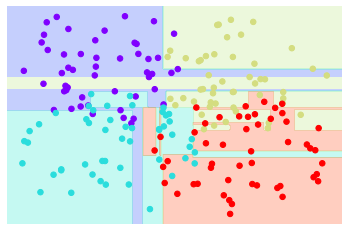

In [206]:
visualize_classifier(RandomForest(n_estimators=1), x, y)

## **Implementing Bagging and Random Forest from sklearn**

### **Decision Tree Classifier**

In [207]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.76

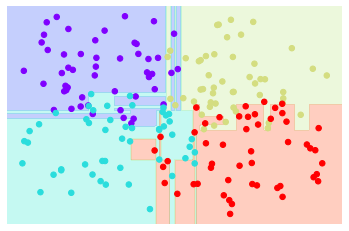

In [208]:
visualize_classifier(clf, x, y)

### **Tree + Bagging Classifier**

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag = bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8

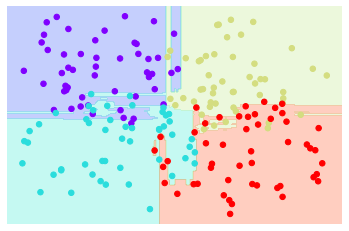

In [210]:
visualize_classifier(bag, x, y)

### **Random Forest Classifier**

In [211]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=100, random_state=0)
RandomForest = RandomForest.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

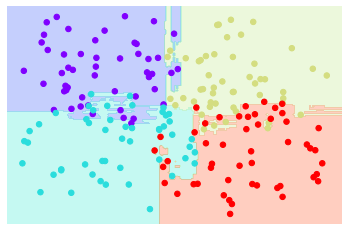

In [212]:
visualize_classifier(RandomForest, x, y)

## **Reference**

* VanderPlas, J. (n.d.). In-depth: Decision trees and random forests. In-Depth: Decision Trees and Random Forests | Python Data Science Handbook. Retrieved January 23, 2023, from `https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html` 

* Random forests from scratch. (n.d.). Retrieved January 23, 2023, from `https://carbonati.github.io/posts/random-forests-from-scratch/` 

In [213]:
%%shell
jupyter nbconvert --to html ML_Algorithms_Random_Forest.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_Random_Forest.ipynb to html
[NbConvertApp] Writing 521748 bytes to ML_Algorithms_Random_Forest.html
